In [160]:
import torchvision as tv
import time
import torch
from matplotlib import pyplot as plt

In [161]:
target_acc = 0.88
# заданный порог для тестовой выборки

In [162]:
model_dict = {
    "model_name": [],
    "ep": [],
    "taked": [],
    "train_loss": [],
    "train_acc": [],
    "test_loss": [],
    "test_acc": []
}
# словарь для хранения результатов моделей

#### Функция для построения графиков по результатам обучения и тестирования разных моделей.

Рисует пять графиков и легенду

Аргументы:
- model_dict - словарь, содержащий списки значений для эпох, времени, потерь и точности для каждой модели.
- best_list (необязательный) - список, содержащий имена моделей, которые отображаются на графиках

In [163]:
def plt_show(model_dict, best_list = []):
    fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(20,20))
    fig.suptitle('Plots')
    leg = axs[0, 0]
    ax1 = axs[0, 1]
    ax2 = axs[1, 0]
    ax3 = axs[1, 1]
    ax4 = axs[2, 0]
    ax5 = axs[2, 1]

    for x, y, label in zip(model_dict['ep'] , model_dict['taked'], model_dict['model_name']):
        if (best_list and label in best_list) or not best_list:
            ax1.plot(x , y, label=label)
    ax1.set_xlabel('ep')
    ax1.set_ylabel('taked')
    ax1.set_title('time')

    for x, y, label in zip(model_dict['ep'] , model_dict['train_loss'], model_dict['model_name']):
        if (best_list and label in best_list) or not best_list:
            ax2.plot(x , y)
    ax2.set_xlabel('ep')
    ax2.set_ylabel('train_loss')
    ax2.set_title('train loss')

    for x, y, label in zip(model_dict['ep'] , model_dict['train_acc'], model_dict['model_name']):
        if (best_list and label in best_list) or not best_list:
            ax3.plot(x , y)
    ax3.set_xlabel('ep')
    ax3.set_ylabel('train_acc')
    ax3.set_title('train accuracy')

    for x, y, label in zip(model_dict['ep'] , model_dict['test_loss'], model_dict['model_name']):
        if (best_list and label in best_list) or not best_list:
            ax4.plot(x , y)
    ax4.set_xlabel('ep')
    ax4.set_ylabel('test_loss')
    ax4.set_title('test loss')

    for x, y, label in zip(model_dict['ep'] , model_dict['test_acc'], model_dict['model_name']):
        if (best_list and label in best_list) or not best_list:
            ax5.plot(x , y)
    ax5.set_xlabel('ep')
    ax5.set_ylabel('test_acc')
    ax5.set_title('test accuracy')
    
    ax5.axhline(y=target_acc, color='red', linestyle='--', label='Threshold')
    
    leg.legend(*ax1.get_legend_handles_labels(), loc=2)
    leg.axis("off")

In [164]:
def train_model(model_name_):
    ep_ = []
    taked_ = []
    train_loss_ = []
    train_acc_ = []
    test_loss_ = []
    test_acc_ = []
    for ep in range(num_epochs):
        train_iters, train_passed  = 0, 0
        train_loss, train_acc = 0., 0.
        start=time.time()
        
        model.train()
        for X, y in train:
            trainer.zero_grad()
            y_pred = model(X)
            l = loss(y_pred, y)
            l.backward()
            trainer.step()
            train_loss += l.item()
            train_acc += (y_pred.argmax(dim=1) == y).sum().item()
            train_iters += 1
            train_passed += len(X)
        
        test_iters, test_passed  = 0, 0
        test_loss, test_acc = 0., 0.
        model.eval()
        for X, y in test:
            y_pred = model(X)
            l = loss(y_pred, y)
            test_loss += l.item()
            test_acc += (y_pred.argmax(dim=1) == y).sum().item()
            test_iters += 1
            test_passed += len(X)
        
        ep_.append(ep)
        taked_.append(time.time() - start)
        train_loss_.append(train_loss / train_iters)
        train_acc_.append(train_acc / train_passed)
        test_loss_.append(test_loss / test_iters)
        test_acc_.append(test_acc / test_passed)
        
        print("ep: {}, taked: {:.3f}, train_loss: {:.6f}, train_acc: {:.6f}, test_loss: {:.6f}, test_acc: {:.6f}".format(
            ep, time.time() - start, train_loss / train_iters, train_acc / train_passed,
            test_loss / test_iters, test_acc / test_passed)
        )
    model_dict['model_name'].append(model_name_)
    model_dict['ep'].append(ep_)
    model_dict['taked'].append(taked_)
    model_dict['train_loss'].append(train_loss_)
    model_dict['train_acc'].append(train_acc_)
    model_dict['test_loss'].append(test_loss_)
    model_dict['test_acc'].append(test_acc_)

## Скачивание тренировочной и тестовой части датасета
[Fashion-MNIST](https://github.com/zalandoresearch/fashion-mnist)

In [165]:
BATCH_SIZE=256

In [166]:
train_dataset = tv.datasets.FashionMNIST('.', train=True, transform=tv.transforms.ToTensor(), download=True)
test_dataset = tv.datasets.FashionMNIST('.', train=False, transform=tv.transforms.ToTensor(), download=True)
train = torch.utils.data.DataLoader(train_dataset, batch_size=BATCH_SIZE)
test = torch.utils.data.DataLoader(test_dataset, batch_size=BATCH_SIZE)

## Построение модели, стартовая архитектура

In [167]:
loss = torch.nn.CrossEntropyLoss()

In [168]:
num_epochs = 20
model = torch.nn.Sequential(
    torch.nn.Flatten(),
    torch.nn.Linear(784, 256),
    torch.nn.ReLU(),
    torch.nn.Linear(256, 10)
)

trainer = torch.optim.SGD(model.parameters(), lr=.01)

Количество эпох обучения: 20

Последовательность слоев:
- слой преобразования в одномерный вектор
- линейный слой (784, 256)
- нелинейный слой. функция активации ReLU
- линейный слой (256, 10)

Оптимизатор 
- стохастический градиентный спуск (SGD)

## Обучение модели и сверка качества на тестовой части с заданным порогом

In [169]:
train_model('Стартовая')

ep: 0, taked: 2.982, train_loss: 1.728877, train_acc: 0.537983, test_loss: 1.280315, test_acc: 0.653600
ep: 1, taked: 2.898, train_loss: 1.072753, train_acc: 0.672200, test_loss: 0.947683, test_acc: 0.673400
ep: 2, taked: 2.929, train_loss: 0.866971, train_acc: 0.698333, test_loss: 0.822660, test_acc: 0.698400
ep: 3, taked: 2.871, train_loss: 0.773556, train_acc: 0.730050, test_loss: 0.752086, test_acc: 0.730900
ep: 4, taked: 2.863, train_loss: 0.714739, train_acc: 0.755517, test_loss: 0.703090, test_acc: 0.751700
ep: 5, taked: 2.819, train_loss: 0.671838, train_acc: 0.772550, test_loss: 0.666179, test_acc: 0.767000
ep: 6, taked: 2.927, train_loss: 0.638623, train_acc: 0.785550, test_loss: 0.637404, test_acc: 0.779300
ep: 7, taked: 2.760, train_loss: 0.612173, train_acc: 0.795767, test_loss: 0.614519, test_acc: 0.788100
ep: 8, taked: 2.789, train_loss: 0.590754, train_acc: 0.802850, test_loss: 0.596007, test_acc: 0.794100
ep: 9, taked: 2.846, train_loss: 0.573096, train_acc: 0.808217, 

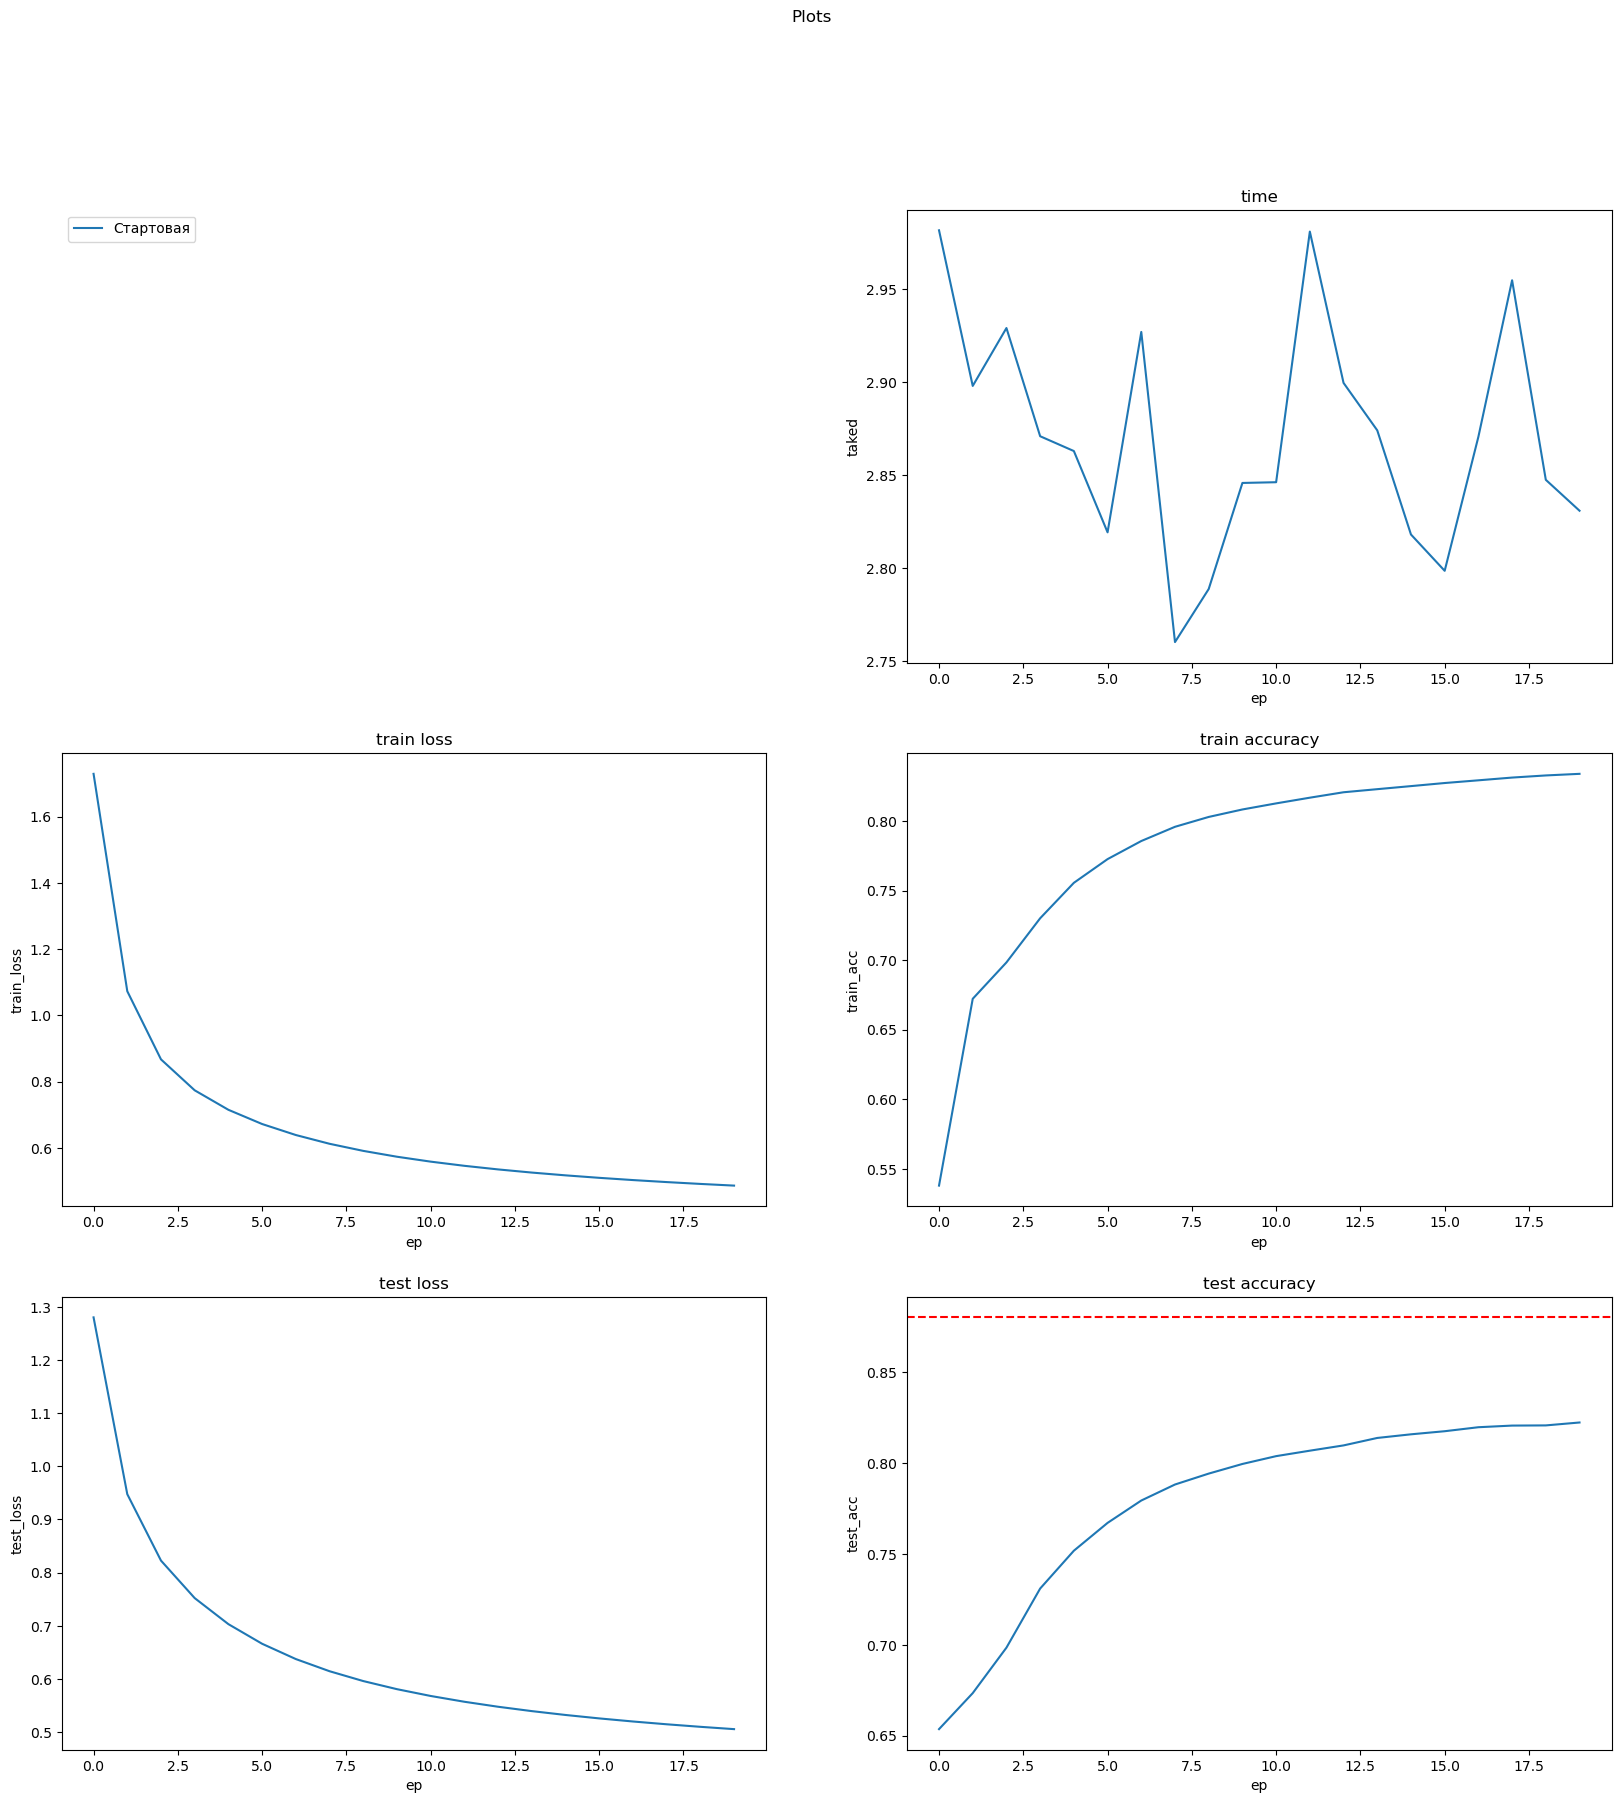

In [170]:
plt_show(model_dict)
# на графике test accuracy проведен порог красной пунктирной линеей

## Меняем архитектуру модели

In [171]:
model = torch.nn.Sequential(
    torch.nn.Flatten(),
    torch.nn.Linear(784, 256),
    torch.nn.ReLU(),
    torch.nn.Linear(256, 10)
)
trainer = torch.optim.Adam(model.parameters(), lr=.01)
# меняем оптимизатор на Adam
train_model('Оптимизатор Adam')

ep: 0, taked: 2.873, train_loss: 0.546702, train_acc: 0.805983, test_loss: 0.451931, test_acc: 0.836900
ep: 1, taked: 2.881, train_loss: 0.381122, train_acc: 0.861317, test_loss: 0.413490, test_acc: 0.853100
ep: 2, taked: 2.920, train_loss: 0.346958, train_acc: 0.872717, test_loss: 0.388873, test_acc: 0.862300
ep: 3, taked: 3.070, train_loss: 0.329280, train_acc: 0.877817, test_loss: 0.390047, test_acc: 0.862500
ep: 4, taked: 3.209, train_loss: 0.314120, train_acc: 0.883417, test_loss: 0.403901, test_acc: 0.854200
ep: 5, taked: 3.038, train_loss: 0.303072, train_acc: 0.888383, test_loss: 0.396122, test_acc: 0.863900
ep: 6, taked: 3.025, train_loss: 0.294815, train_acc: 0.889333, test_loss: 0.401673, test_acc: 0.861700
ep: 7, taked: 3.103, train_loss: 0.285381, train_acc: 0.893200, test_loss: 0.425298, test_acc: 0.860600
ep: 8, taked: 2.987, train_loss: 0.276307, train_acc: 0.896200, test_loss: 0.419461, test_acc: 0.861100
ep: 9, taked: 3.223, train_loss: 0.274788, train_acc: 0.897567, 

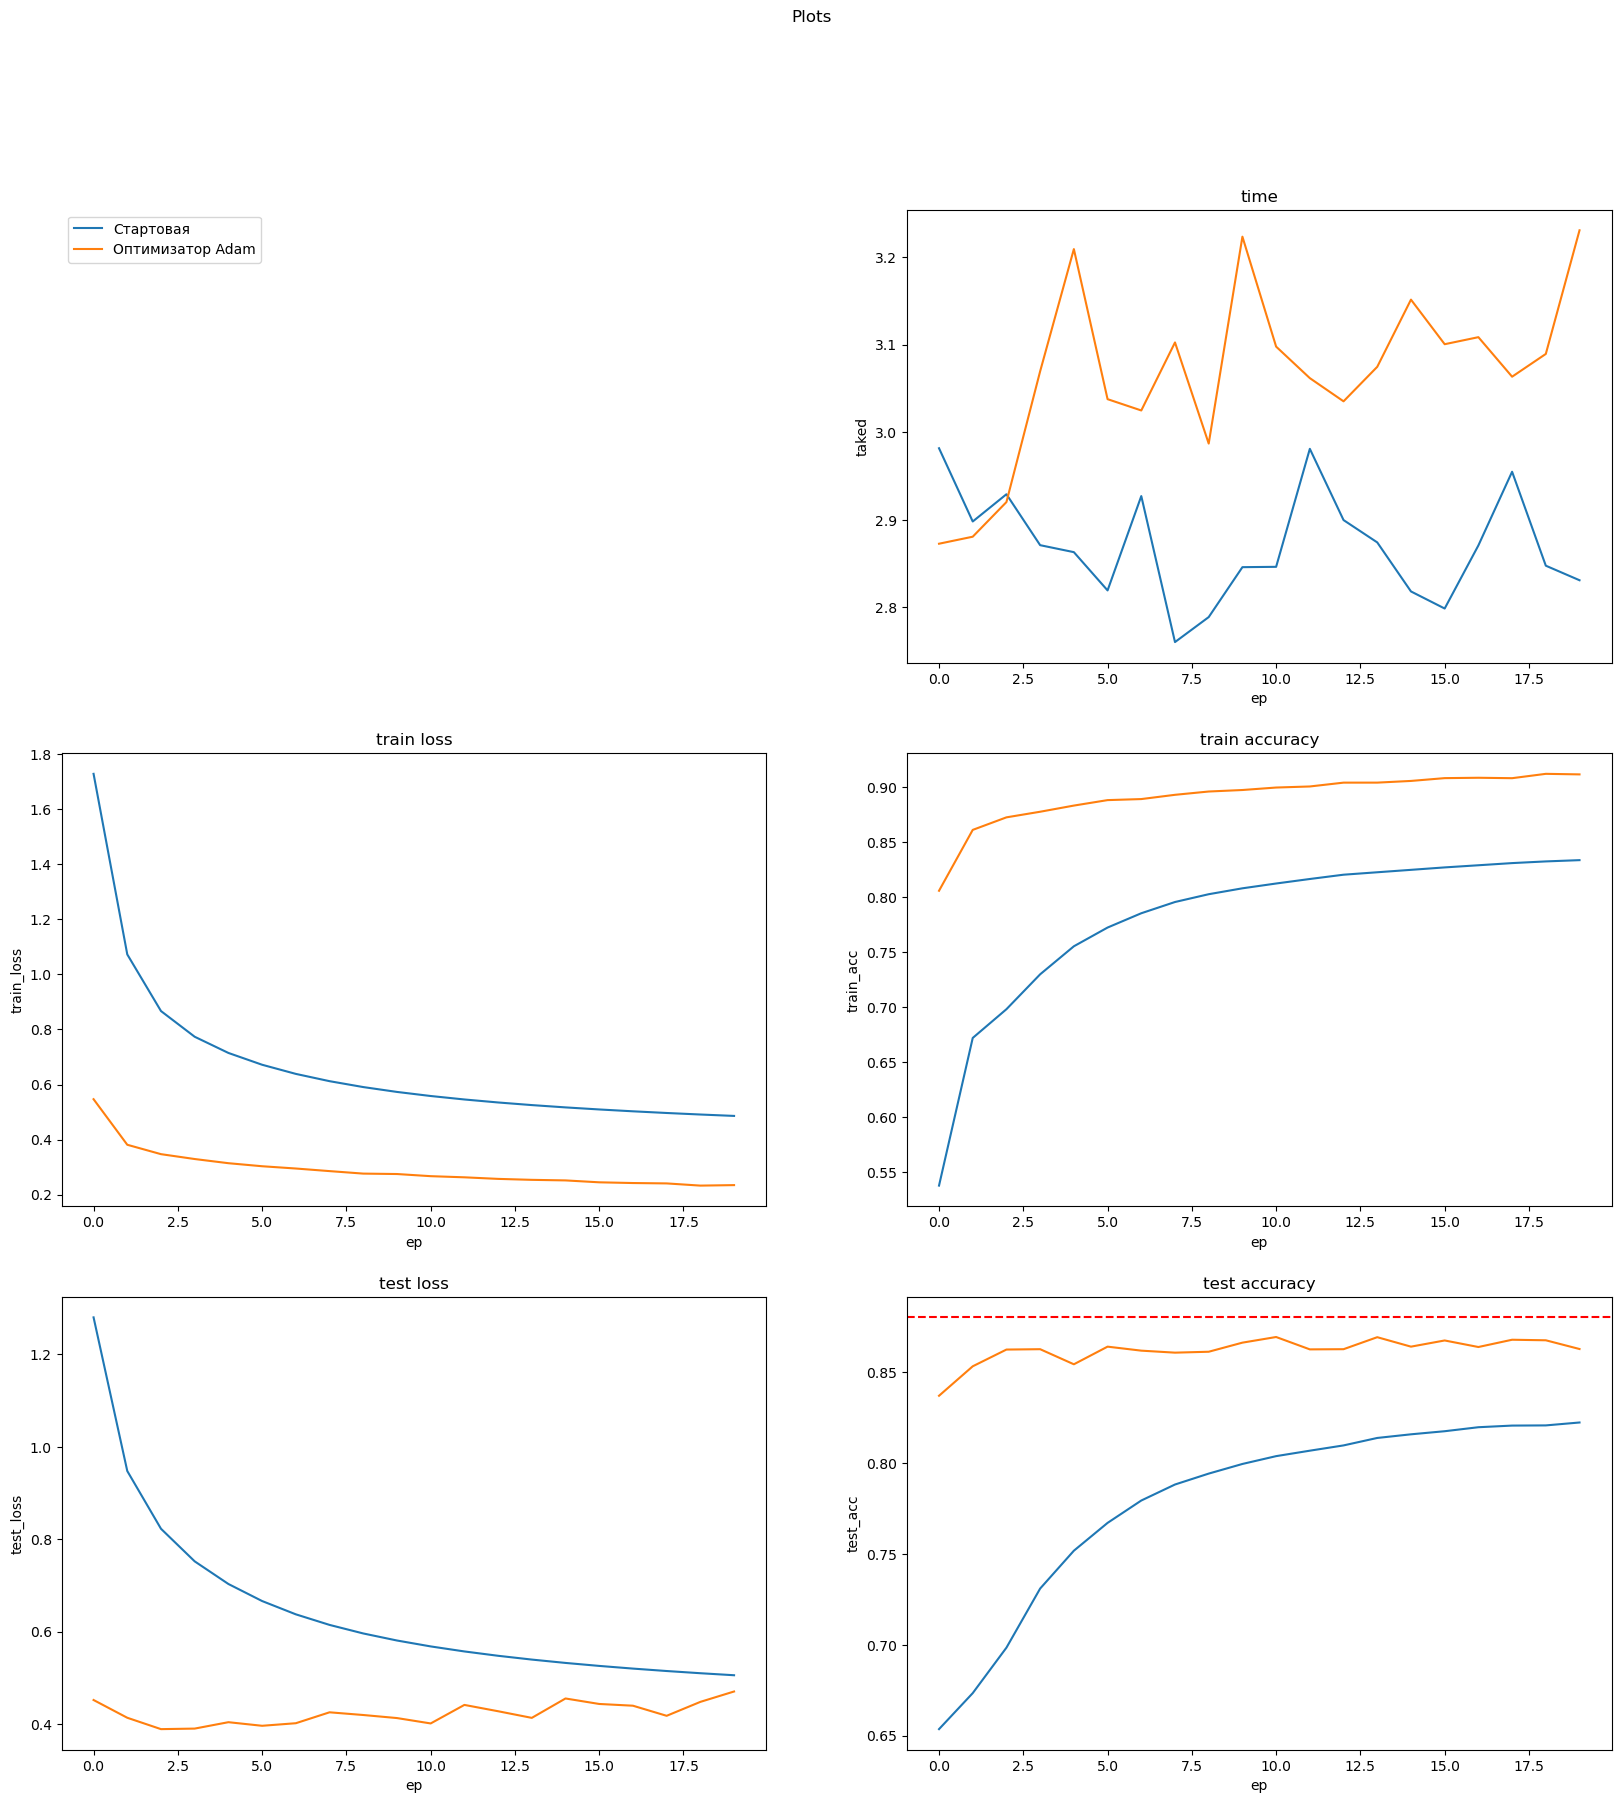

In [172]:
plt_show(model_dict)

In [173]:
model = torch.nn.Sequential(
    torch.nn.Flatten(),
    torch.nn.Linear(784, 512),
    torch.nn.ReLU(),
    torch.nn.Linear(512, 256),
    torch.nn.ReLU(),
    torch.nn.Linear(256, 128),
    torch.nn.ReLU(),
    torch.nn.Linear(128, 10)
)
# усложняем модель добавлением линейных слоев
trainer = torch.optim.Adam(model.parameters(), lr=.01)
train_model('+2 слоя и опт. Adam')

ep: 0, taked: 4.255, train_loss: 0.582288, train_acc: 0.782433, test_loss: 0.450957, test_acc: 0.835500
ep: 1, taked: 3.992, train_loss: 0.398112, train_acc: 0.854617, test_loss: 0.385585, test_acc: 0.857500
ep: 2, taked: 3.982, train_loss: 0.365335, train_acc: 0.865550, test_loss: 0.386816, test_acc: 0.866200
ep: 3, taked: 4.694, train_loss: 0.346404, train_acc: 0.872150, test_loss: 0.389758, test_acc: 0.867300
ep: 4, taked: 4.800, train_loss: 0.330415, train_acc: 0.877883, test_loss: 0.395181, test_acc: 0.864400
ep: 5, taked: 4.731, train_loss: 0.320887, train_acc: 0.881183, test_loss: 0.396590, test_acc: 0.859300
ep: 6, taked: 4.718, train_loss: 0.303689, train_acc: 0.885217, test_loss: 0.419638, test_acc: 0.855900
ep: 7, taked: 4.730, train_loss: 0.297606, train_acc: 0.890033, test_loss: 0.396135, test_acc: 0.864900
ep: 8, taked: 4.842, train_loss: 0.298183, train_acc: 0.888833, test_loss: 0.417639, test_acc: 0.853700
ep: 9, taked: 4.762, train_loss: 0.286574, train_acc: 0.892133, 

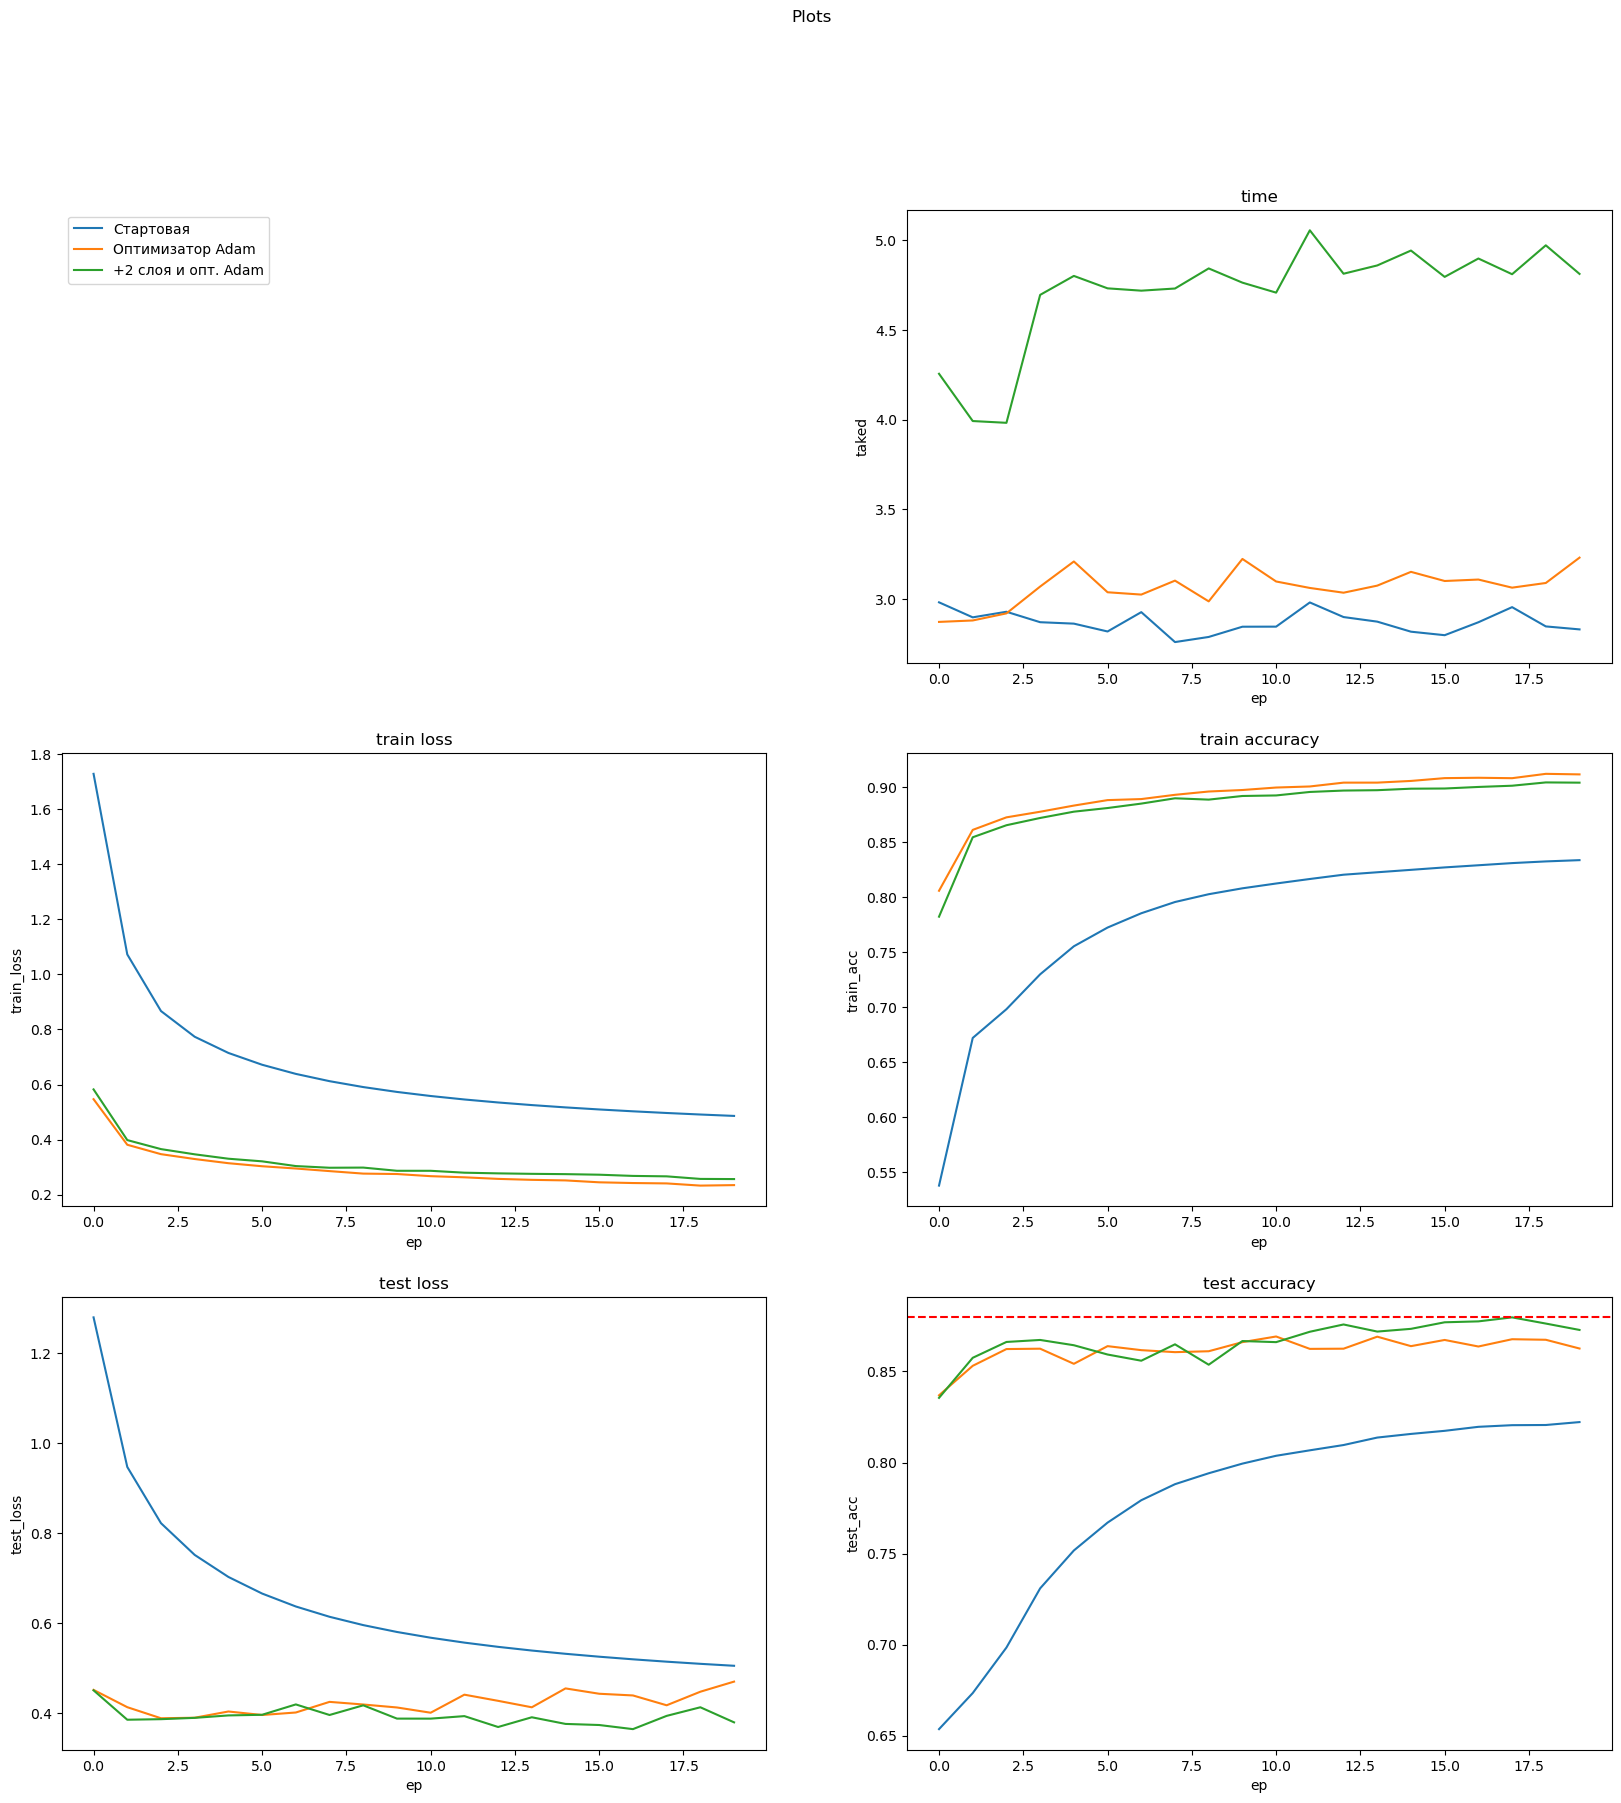

In [174]:
plt_show(model_dict)

In [175]:
model = torch.nn.Sequential(
    torch.nn.Flatten(),
    torch.nn.Linear(784, 512),
    torch.nn.ReLU(),
    torch.nn.Linear(512, 256),
    torch.nn.ReLU(),
    torch.nn.Linear(256, 128),
    torch.nn.ReLU(),
    torch.nn.Linear(128, 10)
)
trainer = torch.optim.Adam(model.parameters(), lr=.001)
# уменьшим скорось обучения, чтобы точнее найти оптимальное решение
train_model('+2 слоя и опт. Adam (lr=.001)')

ep: 0, taked: 4.076, train_loss: 0.626287, train_acc: 0.777500, test_loss: 0.460508, test_acc: 0.832300
ep: 1, taked: 3.993, train_loss: 0.397812, train_acc: 0.856000, test_loss: 0.397690, test_acc: 0.855000
ep: 2, taked: 3.985, train_loss: 0.347329, train_acc: 0.873283, test_loss: 0.396686, test_acc: 0.855500
ep: 3, taked: 4.149, train_loss: 0.315874, train_acc: 0.883533, test_loss: 0.380171, test_acc: 0.863200
ep: 4, taked: 4.268, train_loss: 0.294818, train_acc: 0.891517, test_loss: 0.363138, test_acc: 0.870300
ep: 5, taked: 4.106, train_loss: 0.279526, train_acc: 0.896067, test_loss: 0.362063, test_acc: 0.871100
ep: 6, taked: 4.125, train_loss: 0.263405, train_acc: 0.901717, test_loss: 0.341477, test_acc: 0.879100
ep: 7, taked: 4.125, train_loss: 0.250442, train_acc: 0.905883, test_loss: 0.350221, test_acc: 0.876300
ep: 8, taked: 4.430, train_loss: 0.240356, train_acc: 0.910417, test_loss: 0.356215, test_acc: 0.876300
ep: 9, taked: 4.163, train_loss: 0.228929, train_acc: 0.914567, 

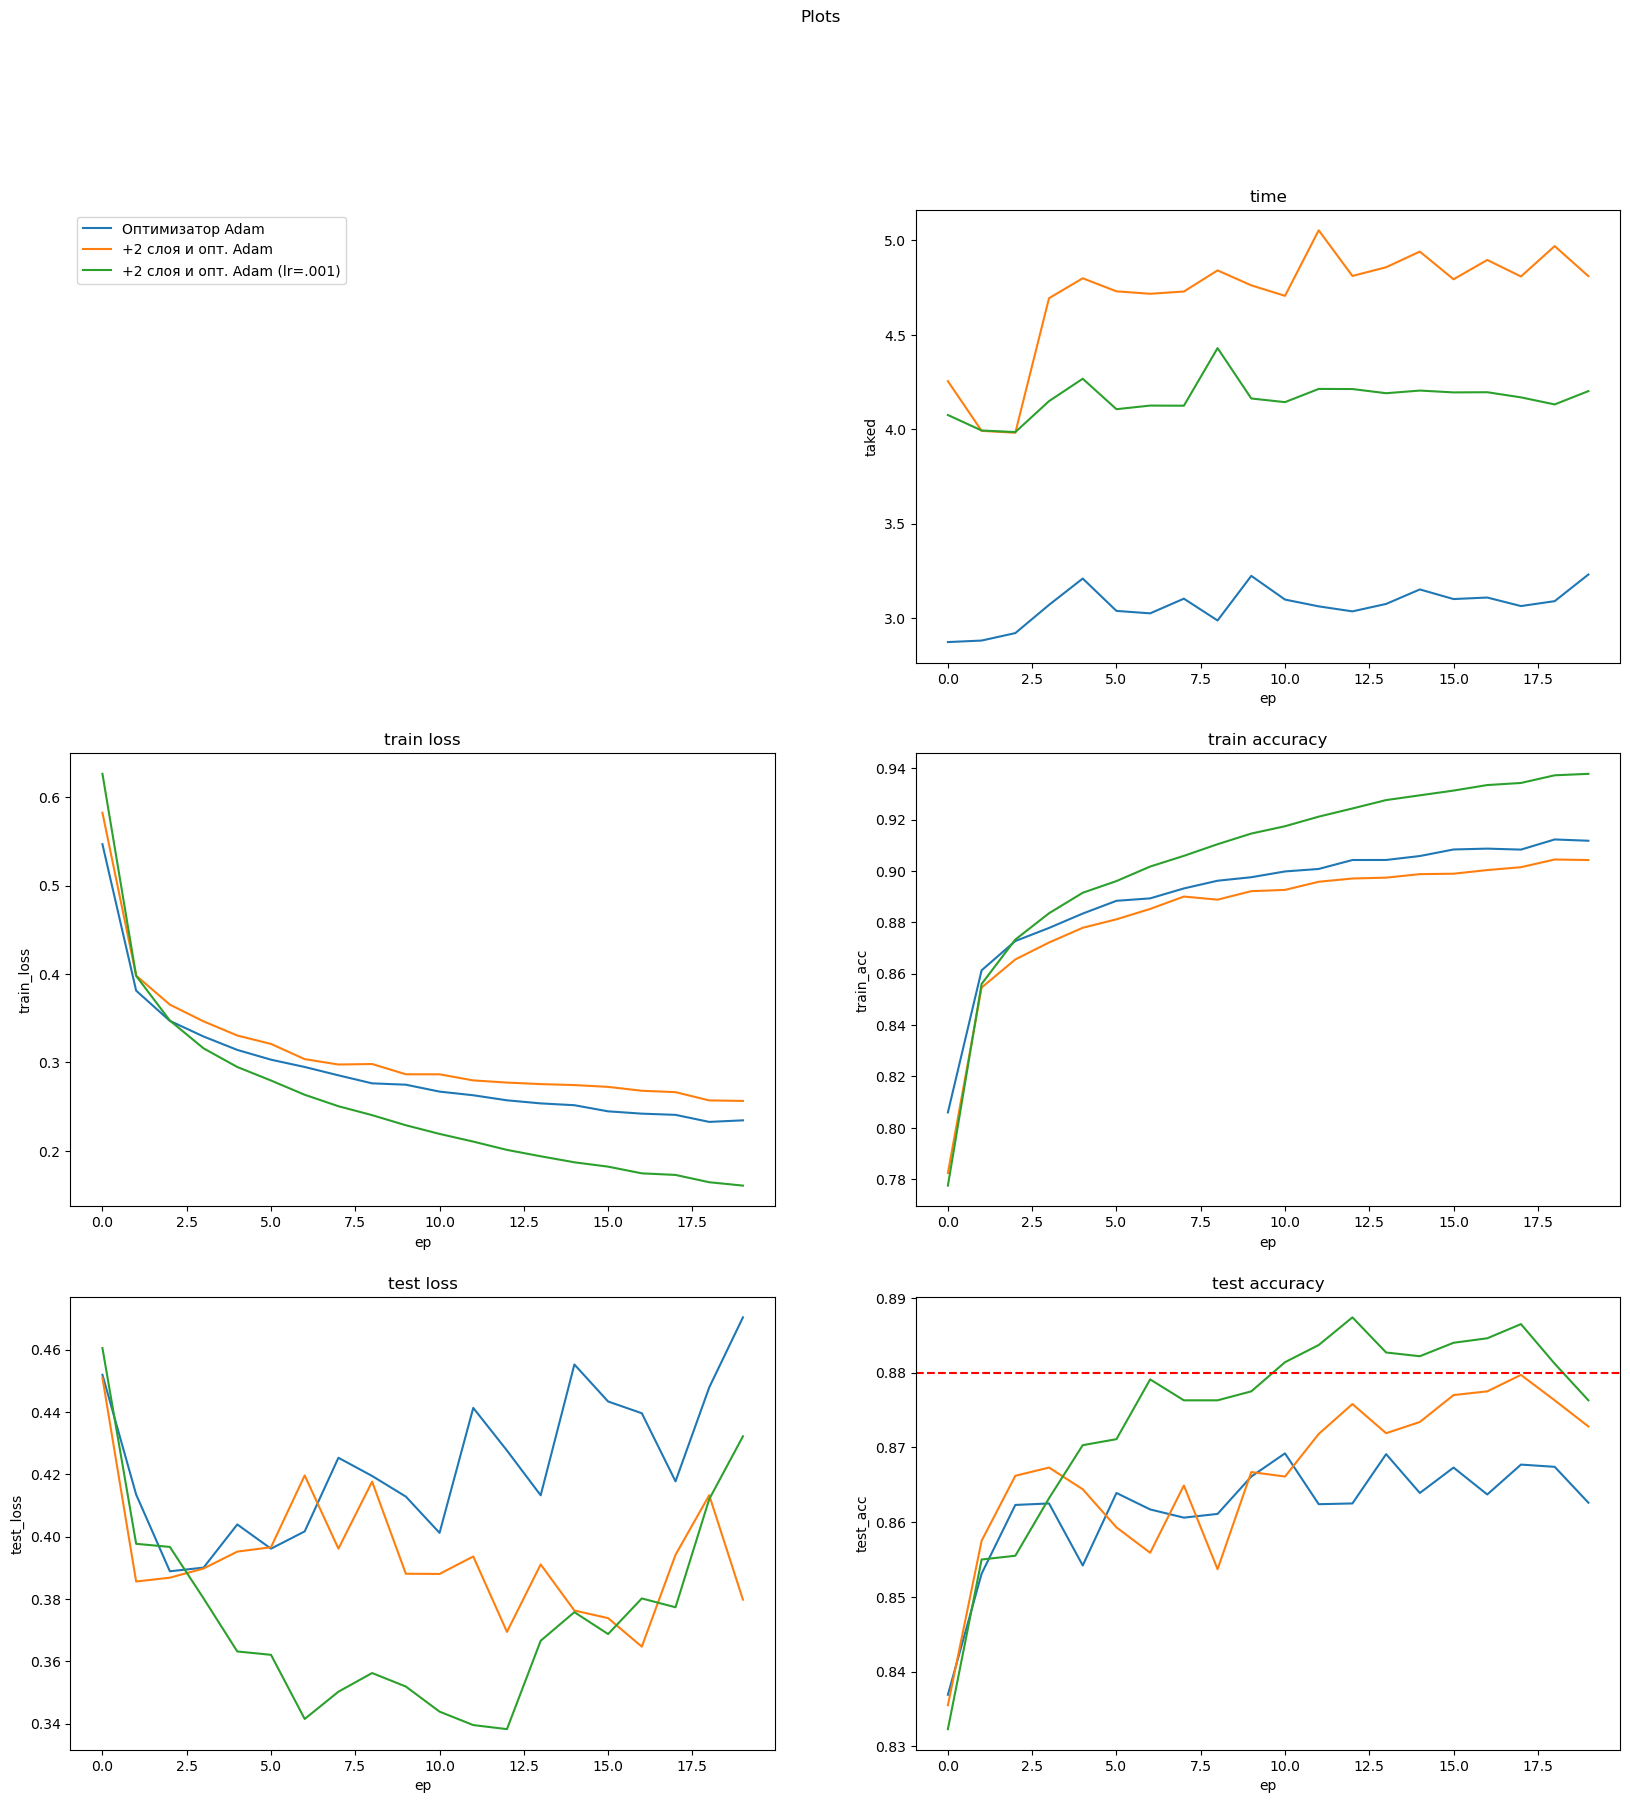

In [177]:
plt_show(model_dict, ['Оптимизатор Adam','+2 слоя и опт. Adam','+2 слоя и опт. Adam (lr=.001)'])

Мы достигли порога точности, но модель начинает переобучаться (test loss растет).

Подбираем дальше

In [179]:
model = torch.nn.Sequential(
    torch.nn.Flatten(),
    torch.nn.Linear(784, 512),
    torch.nn.ReLU(),
    torch.nn.Dropout(0.2),
    torch.nn.Linear(512, 256),
    torch.nn.ReLU(),
    torch.nn.Dropout(0.2),
    torch.nn.Linear(256, 128),
    torch.nn.ReLU(),
    torch.nn.Dropout(0.2),
    torch.nn.Linear(128, 10)
)
# добавляем Dropout чтобы предотвратить переобучение
trainer = torch.optim.Adam(model.parameters(), lr=.001)
train_model('+2 слоя, опт. Adam (lr=.001), Dropout')

ep: 0, taked: 4.034, train_loss: 0.665257, train_acc: 0.759333, test_loss: 0.456206, test_acc: 0.833200
ep: 1, taked: 4.100, train_loss: 0.415147, train_acc: 0.850200, test_loss: 0.407475, test_acc: 0.851800
ep: 2, taked: 4.150, train_loss: 0.371854, train_acc: 0.864917, test_loss: 0.390334, test_acc: 0.859500
ep: 3, taked: 4.164, train_loss: 0.345678, train_acc: 0.873850, test_loss: 0.369615, test_acc: 0.865800
ep: 4, taked: 4.148, train_loss: 0.328831, train_acc: 0.879367, test_loss: 0.353800, test_acc: 0.875500
ep: 5, taked: 4.205, train_loss: 0.311436, train_acc: 0.885667, test_loss: 0.351832, test_acc: 0.875200
ep: 6, taked: 4.289, train_loss: 0.303030, train_acc: 0.887667, test_loss: 0.364204, test_acc: 0.869600
ep: 7, taked: 4.188, train_loss: 0.290802, train_acc: 0.893600, test_loss: 0.328857, test_acc: 0.881000
ep: 8, taked: 4.214, train_loss: 0.280836, train_acc: 0.896333, test_loss: 0.331262, test_acc: 0.883800
ep: 9, taked: 4.140, train_loss: 0.272283, train_acc: 0.899317, 

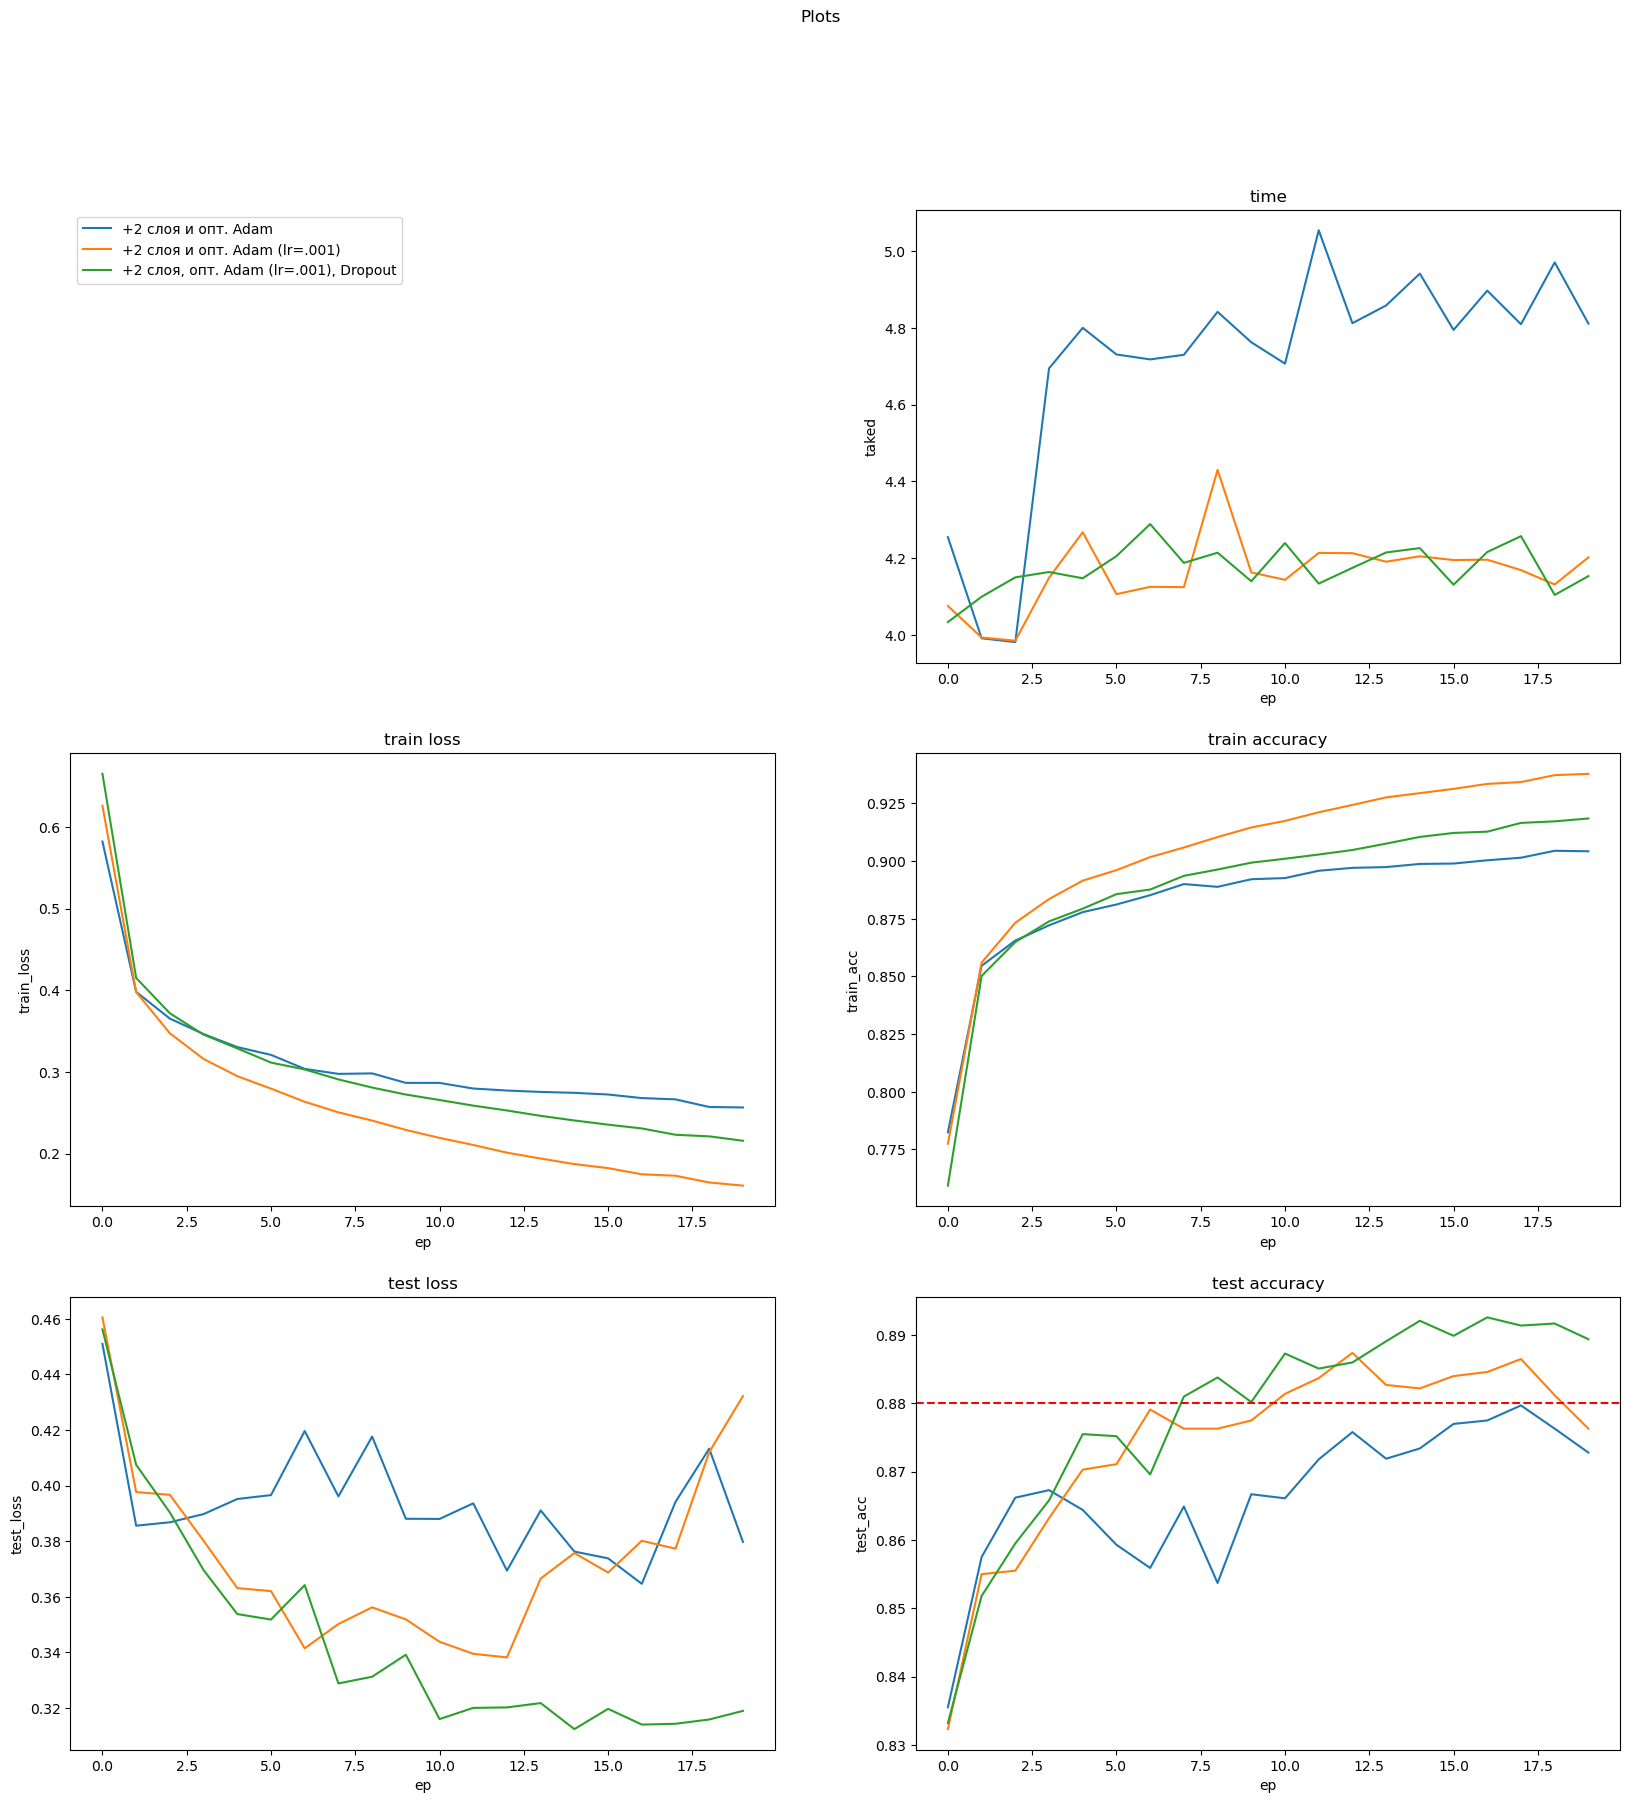

In [180]:
plt_show(model_dict, ['+2 слоя и опт. Adam','+2 слоя и опт. Adam (lr=.001)','+2 слоя, опт. Adam (lr=.001), Dropout'])

Цель достугнута
- модель обучается
- модель показала качество на тесте более 88%

Из всех экспериментов, еще была следующая хорошая модель

In [186]:
model = torch.nn.Sequential(
    torch.nn.Flatten(),
    torch.nn.Linear(784, 256),
    torch.nn.ReLU(),
    torch.nn.BatchNorm1d(256),
    torch.nn.Dropout(0.2),
    torch.nn.Linear(256, 128),
    torch.nn.ReLU(),
    torch.nn.BatchNorm1d(128),
    torch.nn.Dropout(0.2),
    torch.nn.Linear(128, 10)
)
trainer = torch.optim.Adam(model.parameters(), lr=.0001)
train_model('3 слоя (256-128), Adam (lr=.0001), BatchNorm1d, Dropout')

ep: 0, taked: 3.232, train_loss: 0.772920, train_acc: 0.767067, test_loss: 0.514219, test_acc: 0.833300
ep: 1, taked: 3.289, train_loss: 0.472056, train_acc: 0.843600, test_loss: 0.432910, test_acc: 0.849900
ep: 2, taked: 3.353, train_loss: 0.409199, train_acc: 0.860167, test_loss: 0.393561, test_acc: 0.861700
ep: 3, taked: 3.233, train_loss: 0.372596, train_acc: 0.870400, test_loss: 0.376236, test_acc: 0.864300
ep: 4, taked: 3.274, train_loss: 0.347968, train_acc: 0.876850, test_loss: 0.367724, test_acc: 0.867600
ep: 5, taked: 3.410, train_loss: 0.332174, train_acc: 0.883383, test_loss: 0.350507, test_acc: 0.874400
ep: 6, taked: 3.351, train_loss: 0.317295, train_acc: 0.885883, test_loss: 0.350382, test_acc: 0.869800
ep: 7, taked: 3.680, train_loss: 0.305921, train_acc: 0.890417, test_loss: 0.345980, test_acc: 0.872800
ep: 8, taked: 3.260, train_loss: 0.295887, train_acc: 0.893067, test_loss: 0.335028, test_acc: 0.876900
ep: 9, taked: 3.304, train_loss: 0.284900, train_acc: 0.895950, 

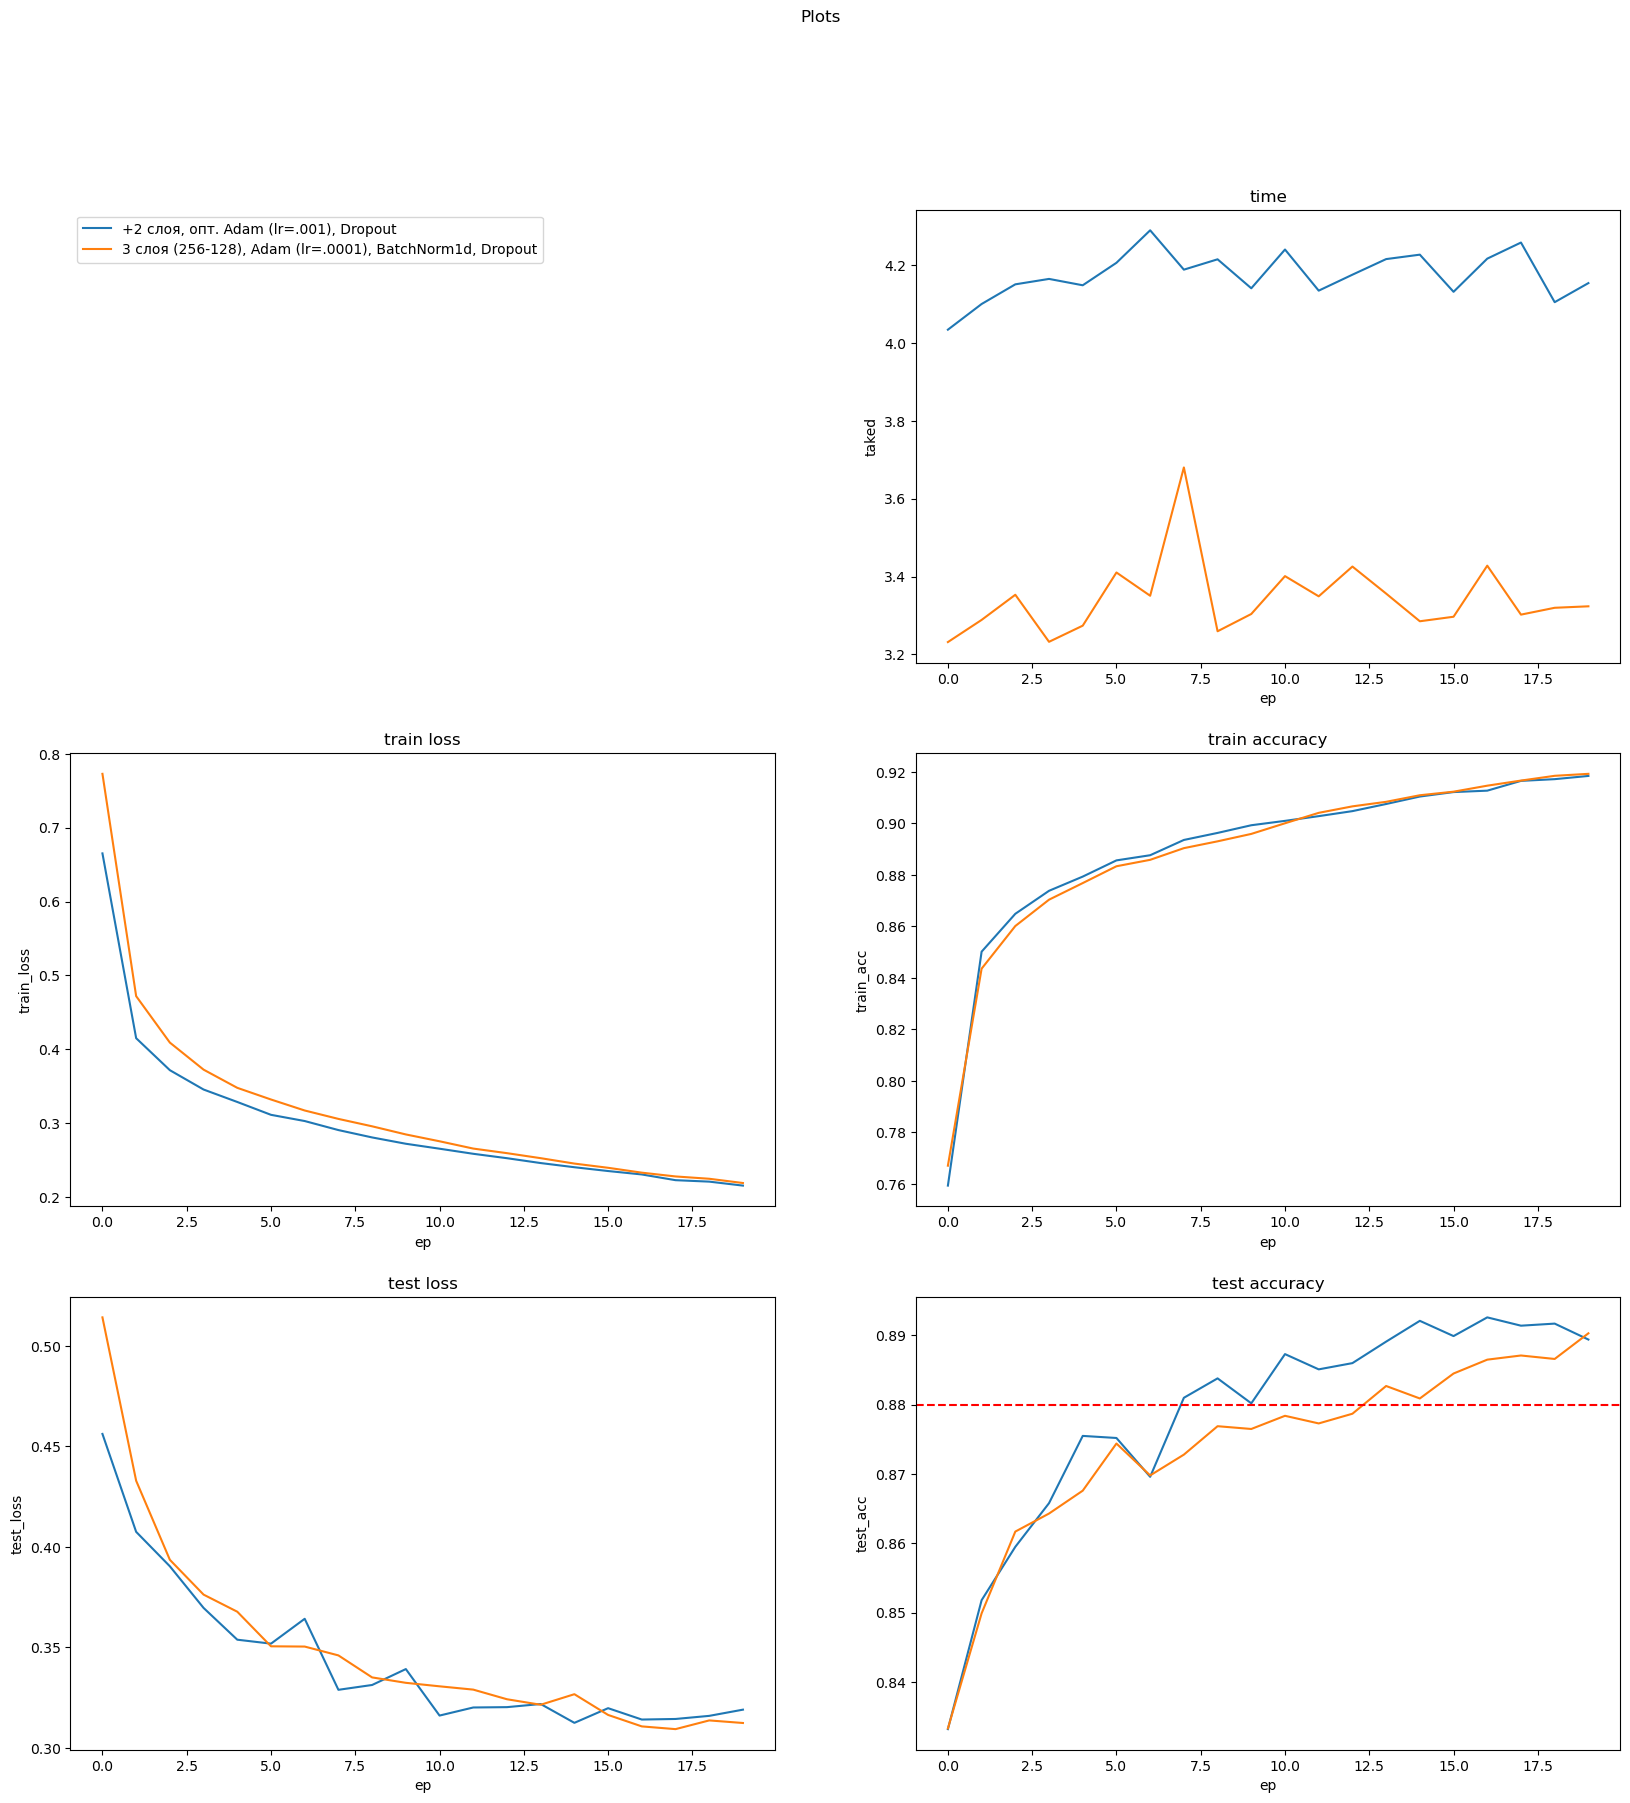

In [188]:
plt_show(model_dict, [
    '+2 слоя, опт. Adam (lr=.001), Dropout',
    '3 слоя (256-128), Adam (lr=.0001), BatchNorm1d, Dropout'
])